In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer                 
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Reading data from CSV files

*   NLP_Data_Set.csv file contains statements of public figures and impact of those statements on society as positive and negative 
*   Stop_words_sinhala.csv file contains list of sinhala stop words



In [3]:
from google.colab import files
data_load = files.upload()

Saving NLP_Data_Set.csv to NLP_Data_Set.csv


In [57]:
df_all_posts = pd.read_csv('NLP_Data_Set.csv')
df_all_posts

,Statement,Impact,StateLength
0,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,403
1,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,298
2,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,91
3,හෙළPay for Business\niOS App එක මේ වන විට Appl...,Positive,112
4,Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. ❤️...,Positive,359
...,...,...,...
1017,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,Negative,148
1018,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,Positive,297
1019,First Leopard Death for the year reported from...,Negative,240
1020,"සත්ව සංරක්ෂණයේ වැදගත්කම ශ්‍රී ලංකාවේ වන අලි 7,...",Negative,274


In [33]:
stop_words_load = files.upload()

In [58]:
df_sinhala_stop_words = pd.read_csv('sinhala_stop_words.csv')
df_sinhala_stop_words

,සහ
0,සමග
1,සමඟ
2,අහා
3,ආහ්
4,ආ
...,...
185,වස්
186,මෙන්
187,ලෙස
188,පරිදි


In [59]:
print(df_all_posts[df_all_posts['Impact']=='Positive'])
print('\n------------------------------------------------------------------------------------------\n')
print(df_all_posts[df_all_posts['Impact']=='Negative'])

                                              Statement    Impact  StateLength
0     මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...  Positive          403
1     අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...  Positive          298
2     Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...  Positive           91
3     හෙළPay for Business\niOS App එක මේ වන විට Appl...  Positive          112
4     Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. ❤️...  Positive          359
...                                                 ...       ...          ...
1009                              බබා කෝලි නම් ගේමක් නෑ  Positive           21
1010                        සුදූ Trending 1 බෝයිස් !!!   Positive           27
1011                                සේ නෝ ටු ගෑණුවලි 🙂👍  Positive           19
1015  අපේ රටේ සමහරු නොදන්න Branding 😎 ආරම්භයේ සිට අව...  Positive          395
1018  රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...  Positive          297

[517 rows x 3 columns]

---------------------------

# Function to plot a pie chart

*   Plot relateionship between positive and negative statements using a pie chart



In [60]:
def plotDataSet(df_all_posts):
  # Declare a figure with a custom size
  fig = plt.figure(figsize=(5, 5))

  # labels for the two classes
  labels = df_all_posts.Impact.unique()

  # colors for two classes
  colors = 'g','r'

  # Sizes for each slide
  sizes = [len(df_all_posts[df_all_posts['Impact']==labels[0]]), len(df_all_posts[df_all_posts['Impact']==labels[1]])] 

  # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.axis('equal')  

  # Display the chart
  plt.show()

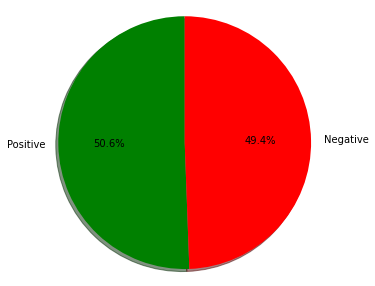

In [61]:
plotDataSet(df_all_posts)

# Encoding lables

*   Replacing values of 'Positive' and 'Negative' with 1 and 0 respectively
*   Plot a pie chart with encoded labels





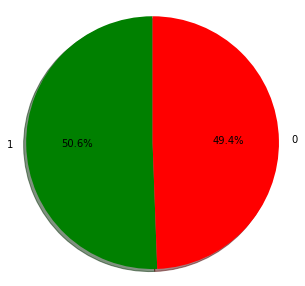

In [62]:
df_all_posts.replace('Positive', 1, True)
df_all_posts.replace('Negative', 0, True)
plotDataSet(df_all_posts)

# Removing statements haivng long and short sentences

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Statement Length'),
 Text(0.5, 1.0, 'Frequency Histogram with Statements Length')]

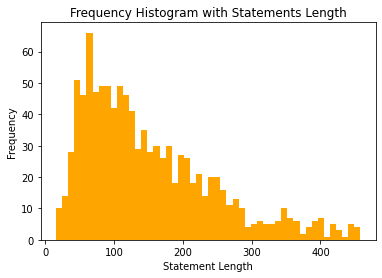

In [63]:
plt.hist(df_all_posts.StateLength, bins=50, color='orange')
plt.gca().set(title='Frequency Histogram with Statements Length', ylabel='Frequency', xlabel='Statement Length')

In [64]:
df_all_posts.dropna(subset=['Statement', 'Impact'], inplace=True)
df_all_posts.drop(df_all_posts[(df_all_posts['StateLength'] < 20) | (df_all_posts['StateLength'] > 300)].index, inplace=True)
df_all_posts

,Statement,Impact,StateLength
1,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,1,298
2,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",1,91
3,හෙළPay for Business\niOS App එක මේ වන විට Appl...,1,112
6,හෙට දිනයේ ආරම්භ වන ආසියානු කුසලාන ක්‍රිකට් තරඟ...,1,170
8,අපි අප්පච්චි වටේ ආඩම්බරෙන් ඉන්නවා වගේ එයා සුව ...,0,270
...,...,...,...
1016,යාල සිද්ධියට සම්බන්ධ පුද්ගලයින් සහ වාහන blackl...,0,54
1017,🔴Tragedy🔴 - ලොව වැඩිම අලි මරණ ශ්‍රී ලංකාවෙන්.....,0,148
1018,රටේ දැනට පවත්නා අලි- මිනිස් ගැටුම් වලට විසඳුමක...,1,297
1019,First Leopard Death for the year reported from...,0,240


# Plot a pie chart with filtered statements after removing statements as outliers

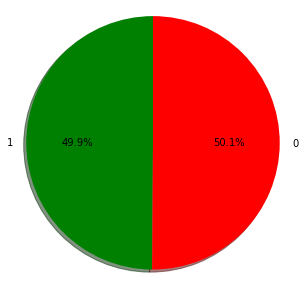

In [65]:
plotDataSet(df_all_posts)

# Creating instance for Lemmatization and Stemming

In [66]:
# Create an instance of WordNetLemmatizer.
lematizer = WordNetLemmatizer()

# Create an instance of PorterStemmer()
porterStemmer = PorterStemmer()

# Processing statements

*   Removing leading and trailing whitespaces
*   Removing hyperlinks
*   Removing punctuations and special characters
*   Converting statement into lower case
*   Spliting the sentence into words
*   Removing sinhala and english stop words
*   Lemmatizing and stemming









In [67]:
def process_post(post):
  # Removing leading and trailing whitespaces
  post.strip()

  # remove hyperlinks
  post= re.sub(r"https?:\/\/.*[\r\n]*", "", post)

  # Remove special characters.
  post = re.sub('[^a-zA-Z\u0D80-\u0DFF\u200d]', ' ', str(post))

  # Convert the string to lowe case.
  post = post.lower()

  # Split the sentence into words.
  post = word_tokenize(post)

  # Remove English Stop Words
  post = [word for word in post if word not in stopwords.words('english')]

  # Remove Sinhala Stop Words
  post = [word for word in post if word not in df_sinhala_stop_words]

  # Lemmalization on words
  post = [lematizer.lemmatize(word) for word in post]

  # Stemming on words
  post = [porterStemmer.stem(word) for word in post]

  return post


In [68]:
print(process_post('{@set එක ආවා!}🤣😃😜?'))

['set', 'එක', 'ආවා']


In [69]:
cleaned_post = process_post(df_all_posts.iloc[0].Statement)
print('Before the cleaning: ', df_all_posts.iloc[0].Statement)
print('\nAfter the cleaning: ', cleaned_post)

Before the cleaning:  අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns College එකේ 
මට ඉන්දියාවේ Bhathkande University එකේ අපි ඉගෙන ගන්න කාලෙ මතක් උනා 
අපේ ගුරැවරැ ශිෂ්‍යයන් කාර්‍යමණ්ඩලය සියලුම දෙනා University එකට ඇතුල් වෙන්නේ ඒ පොලවට වැදලා
අද උදේ නුගේගොඩ St,Johns ලමයින්ගෙන් මම ඒ දේ දැක්කා 
ජයවේවා සියලුම සිසු දරැවන්ට 🙏🙏🙏

After the cleaning:  ['අද', 'උදේ', 'දැකපු', 'සුන්දර', 'දර්ශණයක්', 'නුගේගොඩ', 'st', 'john', 'colleg', 'එකේ', 'මට', 'ඉන්දියාවේ', 'bhathkand', 'univers', 'එකේ', 'අපි', 'ඉගෙන', 'ගන්න', 'කාලෙ', 'මතක්', 'උනා', 'අපේ', 'ගුරැවරැ', 'ශිෂ්\u200dයයන්', 'කාර්\u200dයමණ්ඩලය', 'සියලුම', 'දෙනා', 'univers', 'එකට', 'ඇතුල්', 'වෙන්නේ', 'ඒ', 'පොලවට', 'වැදලා', 'අද', 'උදේ', 'නුගේගොඩ', 'st', 'john', 'ලමයින්ගෙන්', 'මම', 'ඒ', 'දේ', 'දැක්කා', 'ජයවේවා', 'සියලුම', 'සිසු', 'දරැවන්ට']


# Spliting data set into training set and testing set

*   80% out of data set is taken as training data set.
*   20% is taken as testing data set



In [70]:
# Select data for training.
df_training = df_all_posts.sample(frac = 0.8, random_state=3)

# Select data for testing.
df_testing = df_all_posts.drop(df_training.index)

# Building the frequency dictionary using training data set

In [71]:
def build_count_dictionary(df_posts):
  result = {}
  
  for index, row in df_posts.iterrows():
    for word in process_post(row['Statement']):
      key = (word, row['Impact'])

      if key in result:
        result[key] += 1
      else:
        result[key] = 1

  return result

In [72]:
freqency_dictionary = build_count_dictionary(df_training)
freqency_dictionary

{('gall', 1): 2,
 ('gladiat', 1): 1,
 ('ලා', 1): 6,
 ('වගේ', 1): 13,
 ('අන්තිම', 1): 2,
 ('මොහොතේ', 1): 3,
 ('අපේ', 1): 36,
 ('life', 1): 7,
 ('එකත්', 1): 8,
 ('කනපිට', 1): 1,
 ('ගැහෙන්න', 1): 1,
 ('පුලුවන්', 1): 17,
 ('මේක', 1): 16,
 ('තාමත්', 1): 2,
 ('ගොඩක්', 1): 12,
 ('අය', 1): 10,
 ('අහන', 1): 1,
 ('ආදරේ', 1): 1,
 ('කරන', 1): 28,
 ('සින්දුවක්', 1): 1,
 ('thank', 1): 20,
 ('ආදරෙයි', 1): 9,
 ('අපිට', 1): 10,
 ('wish', 1): 11,
 ('කරපු', 1): 12,
 ('හැමෝටම', 1): 9,
 ('බොහොම', 1): 2,
 ('ස්තූති', 1): 1,
 ('sing', 1): 4,
 ('කරන්න', 1): 50,
 ('කැමති', 1): 7,
 ('ඔයාට', 1): 8,
 ('chanc', 1): 3,
 ('එකක්', 1): 63,
 ('දක්ෂයින්ව', 1): 2,
 ('tag', 1): 3,
 ('abhi', 1): 3,
 ('මගේ', 1): 40,
 ('පළමු', 1): 1,
 ('ප්\u200dරසංගයේ', 1): 2,
 ('එක්', 1): 7,
 ('ගීයක්', 1): 1,
 ('මාත්', 1): 4,
 ('එක්ක', 1): 20,
 ('ගයන්න', 1): 1,
 ('එක', 1): 115,
 ('දක්ෂයෙකුට', 1): 1,
 ('අවස්ථාවක්', 1): 1,
 ('දෙන්න', 1): 11,
 ('කැමතියි', 1): 1,
 ('ඒ', 1): 28,
 ('කොහොමද', 1): 3,
 ('කියල', 1): 8,
 ('හෙට', 1): 5,
 ('කියන්නම්', 1)

# Function to retrieve the frequency of a given word

*  Return the frequency of a given word using frequency dictionary according to the label (positive or negative)



In [73]:
def lookup(freqency_dictionary, word, label):
    key = (word, label)
    if key in freqency_dictionary:
      return freqency_dictionary[key]

    return 0

# Training the model using Naive Bayes

 Calculate logprior value

*   Calculate total number of positive posts in the training set
*   Calculate total number of negative documents in the training set

Calculate the log likelihood of the word

*   Calculate the number of unique words in the vocabulary
*   Calculate positive_words_count and negative_words_count
*   Get the frequency of a word according to the class (positive or negative)
*   Calculate the probability that each word is positive, and negative









In [74]:
def train_model(freqency_dictionary, df_posts):
    logprior = 0
    loglikelihood = {}

    # Calculate total number of positive posts in the training set
    positive_posts_count = (len(list(filter(lambda x: x == 1, df_posts['Impact']))))

    # Calculate total number of negative documents in the training set
    negative_posts_count = (len(list(filter(lambda x: x == 0, df_posts['Impact']))))

    # Calculate logprior
    logprior = np.log(positive_posts_count) - np.log(negative_posts_count)

    # calculate the number of unique words in the vocabulary
    unique_words = set([key[0] for key in freqency_dictionary.keys()])
    unique_words_count = len(unique_words)

    # calculate positive_words_count and negative_words_count
    positive_words_count = negative_words_count = 0
    
    for key in freqency_dictionary.keys():
        # if the word label is positive
        if key[1] == 1:
            # Increment the count of positive words by the frequency of (word, label)
            positive_words_count += freqency_dictionary[key]

        # if the word label is negative
        else:
            # increment the count of negative words by the frequency of (word, label)
            negative_words_count += freqency_dictionary[key]

    # For each word in the vocabulary
    for word in unique_words:
        # get the frequency of a word according to the class (positive or negative)
        positive_frequency = lookup(freqency_dictionary,word,1)
        negative_frequency = lookup(freqency_dictionary,word,0)

        # calculate the probability that each word is positive, and negative
        word_positive_probability = (positive_frequency + 1) / (positive_words_count + unique_words_count)
        word_negative_probability = (negative_frequency + 1) / (negative_words_count + unique_words_count)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(word_positive_probability / word_negative_probability)

    return logprior, loglikelihood

In [75]:
logprior, loglikelihood = train_model(freqency_dictionary, df_training)

print(logprior)
print(loglikelihood)
print(len(loglikelihood))

0.0
{'අතර': 0.0025598568413233084, 'ජීවන': -0.6905873237186222, 'yet': 0.002559856841323087, 'චිකේ': -1.0960524318267866, 'bunch': -0.6905873237186222, 'කරුණ': 0.6957070374012684, 'outfit': 0.6957070374012684, 'ප්\u200dරදේශයේ': 0.6957070374012684, 'වෙහෙසෙමු': 1.101172145509433, 'කොල්ලනේ': 0.6957070374012684, 'lotu': 0.002559856841323087, 'ගෙන්වා': 0.6957070374012684, 'තිබීම': 0.6957070374012684, 'ඇතා': 0.6957070374012684, 'කාලයයි': 0.6957070374012684, 'බාගදා': -0.6905873237186222, 'සාමකාමීව': 0.002559856841323087, 'දුක': -0.9137308750328318, 'වන්නේ': 0.002559856841323087, 'index': 0.6957070374012684, 'කියන්නද': -0.6905873237186222, 'පෙරලා': 0.002559856841323087, 'ජීවනය': -0.6905873237186222, 'කොහොමහරි': 0.6957070374012684, 'එකපාරටම': 0.6957070374012684, 'සීමාව': 0.002559856841323087, 'higher': 0.8498577172285268, 'අකමැතියි': -0.6905873237186222, 'ඔවුන්ට': 0.6957070374012684, 'නව': 1.101172145509433, 'ඉල්ලීමක්': 0.6957070374012684, 'number': -0.6905873237186222, 'හිනා': 0.69570703740126

# Testing the model

*   Return the probability of the post/statement according to the class to which the post/statement belongs




In [76]:
def predict_from_model(post, logprior, loglikelihood):
    # process the post/statement to get the list of words
    word_list = process_post(post)

    # initialize probability to zero
    probability = 0

    # add the logprior
    probability += logprior

    for word in word_list:
        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            probability += loglikelihood[word]

    return probability

In [77]:
post = 'මම happy එකේ ඉන්නෙ!'
probability = predict_from_model(post, logprior, loglikelihood)
print('The output probability is', probability)

The output probability is 0.5470405375345444


# Testing the accuracy of the model

*   Return the accuracy of the model using testing data set



In [78]:
def test_model(df_posts, logprior, loglikelihood):   
    accuracy = 0

    y_hats = []
    for post in df_posts['Statement']:
        # if the prediction is > 0
        if predict_from_model(post, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the y_hats list
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats - df_posts['Impact']))

    # Accuracy is 1 minus the error
    accuracy = 1 - error

    return accuracy

In [26]:
print("Model Accuracy = %0.4f" % (test_model(df_testing, logprior, loglikelihood)))

Model Accuracy = 0.7903


# Predicting the class of a given post/statement


*   Return the class as positive, negative or nutral on the give post/statement



In [79]:
def predic_post_class(post, logprior, loglikelihood):
  p = predict_from_model(post, logprior, loglikelihood)
  if p < 0:
    return f"'{post}' Statement has a negative impact (probability = {p:.4f})"
  if p > 0:
    return f"'{post}' Statement has a positive impact (probability = {p:.4f})"
  else:
    return f"'{post}' Statement has a nutral impact (probability = {p:.4f})"

# Evaluation
Evaluating class of a given post using test_post_set

In [80]:
test_post_list = ['මට සතුටුයි', 
                  'මට දුකයි',
                  'උඹ වැඩ spoil කරනවා', 
                  'මේ ලංකාවෙ TEAM එක..අපිට ඕනෙ ලංකාව දිනන්න.ලංකාවෙ ඉදලත් අද අපිට හෙම්බිරිස්සාව...😊',
                  'ලිබරල් ප්‍රජාතන්ත්‍රවාදී ව්‍යාපාරය විශ්වාසය තියන්නේ ego system මත නෙවෙයි eco system මත.',
                  'අධික උද්ධමනයෙන් මිරිකී සිටි ජනතාවගේ බෙල්ල පාගා කොන්ද කඩා දැමුවා',
                  'මට උඹ ගැන sad මචන්',
                  'කවදවාත් job එකක් නැති කරන්න එපා එක මාර පවක්',
                  'Deal දාල කොමිස් ගහලා රටම ණය උගුලක පටලෝලා මහබැංකුවත් සුද්දකරලා බදු මුදල් වංචාකරලා රටට ලැබෙන හිඟමනත් හොරාකාලා රටම කන්න බොන්න බෙහෙත් ටිකත් නැතුව හිඟාකන තත්වෙට පත් කරපු දරුණු අපරාදකාරයො සෙට් එකම අද court එකේදි මුනගැහුන අවස්තාව 💪',
                  'ගොඩක් ස්තූතියි හමෝටම.🙏 Love you so much..❤️❤️❤️'
                  ]
for tweet in test_post_list:
    result = predic_post_class(tweet, logprior, loglikelihood)
    print(result,'\n')

'මට සතුටුයි' Statement has a positive impact (probability = 0.0026) 

'මට දුකයි' Statement has a negative impact (probability = -0.6880) 

'උඹ වැඩ spoil කරනවා' Statement has a negative impact (probability = -0.3854) 

'මේ ලංකාවෙ TEAM එක..අපිට ඕනෙ ලංකාව දිනන්න.ලංකාවෙ ඉදලත් අද අපිට හෙම්බිරිස්සාව...😊' Statement has a positive impact (probability = 5.4193) 

'ලිබරල් ප්‍රජාතන්ත්‍රවාදී ව්‍යාපාරය විශ්වාසය තියන්නේ ego system මත නෙවෙයි eco system මත.' Statement has a negative impact (probability = -7.0475) 

'අධික උද්ධමනයෙන් මිරිකී සිටි ජනතාවගේ බෙල්ල පාගා කොන්ද කඩා දැමුවා' Statement has a negative impact (probability = -8.5277) 

'මට උඹ ගැන sad මචන්' Statement has a negative impact (probability = -3.3194) 

'කවදවාත් job එකක් නැති කරන්න එපා එක මාර පවක්' Statement has a positive impact (probability = 0.4782) 

'Deal දාල කොමිස් ගහලා රටම ණය උගුලක පටලෝලා මහබැංකුවත් සුද්දකරලා බදු මුදල් වංචාකරලා රටට ලැබෙන හිඟමනත් හොරාකාලා රටම කන්න බොන්න බෙහෙත් ටිකත් නැතුව හිඟාකන තත්වෙට පත් කරපු දරුණු අපරාදකාරයො සෙට් එ

In [81]:
print('Enter post to classify:')
input_text = input()
result = predic_post_class(input_text, logprior, loglikelihood)
print(result)

Enter post to classify:
මට උඹේ talent ගැන මාර happy බන්. ජය වේවා! ❤️
'මට උඹේ talent ගැන මාර happy බන්. ජය වේවා! ❤️' Statement has a positive impact (probability = 5.6603)


# Note
Accuarcy of the model has reduced since lemmatization and stemming are not applied for sinhala words.

ex: 'පාර' and 'පාරවල්' words are considered as two words instead of one and 'ගියා' and 'යනවා' words are considered as two words as well.

Further sinhala stop word document may not contain all the stop words in the sinhala language